In [1]:
import pandas as pd
from ipynb.fs.full.utils import get_df, rename_values
from ipynb.fs.full.plots import single_barplot

In [2]:
# get formatted and ready to use dataframe
df = get_df()

In [3]:
df.head()

,ID,Status,Duration,D1_Undergraduation,D1_Specialization,D1_Master,D1_Phd,D1_Courses,D1_Others,D2_Country,...,Q15_Model_Deploy_Production_Monitoring,Q16_Model_Monitor_Aspects_Input_And_Output,Q16_Model_Monitor_Aspects_Interpretability_Output,Q16_Model_Monitor_Aspects_Output_And_Decisions,Q16_Model_Monitor_Aspects_Fairness,Q16_Model_Monitor_Aspects_Others,Q16_Model_Monitor_Aspects_Others_Free,Q17_Automated_Machine_Learning_Tools_Yes_No,Q17_Automated_Machine_Learning_Tools_Yes_Free,Origin
2,31,Completed (31),1317,Economics,-99,M.Sc. in Economics,-99,Data Scientist in Datacamp,-99,Brazil,...,-77,not quoted,not quoted,not quoted,not quoted,not quoted,-99,0,-99,https://ww2.unipark.de/uc/seml/
3,34,Completed (31),854,-99,Management,No,No,No,No,Brazil,...,70,not quoted,not quoted,quoted,not quoted,not quoted,-99,No,-99,-99
4,36,Completed (31),1593,Mathematics,Informatics,MSC Computer Science,PhD computer Science,Vários cursos in Coursera,-99,Brazil,...,60,quoted,not quoted,quoted,not quoted,not quoted,-99,"Yes, Please, specify",Own approach,-99
5,57,Completed (31),4238,Computer Science,Data science specialization,-99,-99,-99,-99,Germany,...,100,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99
6,46,Completed (31),2821,Actuarial Science,Post Graduation in Data Science,M Sc in Data Science -ML models,no Ph D,no other certifications,-99,Brazil,...,80,not quoted,quoted,quoted,not quoted,not quoted,-99,No,-99,-99


In [4]:
df_q12 = df.filter(regex='Q12')
df_q12.head()

,Q12_RE_Most_Difficult_Activity_CustomerExpectactions,Q12_RE_Most_Difficult_Activity_ElicitingAnalyzing,Q12_RE_Most_Difficult_Activity_AligningREData,Q12_RE_Most_Difficult_Activity_Conflicts,Q12_RE_Most_Difficult_Activity_NewQualityAttributes,Q12_RE_Most_Difficult_Activity_Documentation,Q12_RE_Most_Difficult_Activity_SelectingMetrics,Q12_RE_Most_Difficult_Activity_Verification,Q12_RE_Most_Difficult_Activity_ChangingRE,Q12_RE_Most_Difficult_Activity_Customer_Others,Q12_RE_Most_Difficult_Activity_Customer_Others_Free
2,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
3,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99
4,not quoted,quoted,not quoted,not quoted,not quoted,not quoted,quoted,not quoted,not quoted,not quoted,-99
5,quoted,not quoted,not quoted,not quoted,quoted,quoted,not quoted,not quoted,not quoted,not quoted,-99
6,quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,not quoted,-99


In [5]:
#Responses as others

df_q12_others = df_q12.filter(regex='Others')
df_q12_others

for c in df_q12_others.columns:
    print(c)
    print(df_q12_others[c].value_counts())

Q12_RE_Most_Difficult_Activity_Customer_Others
not quoted    191
-77            82
quoted          3
Name: Q12_RE_Most_Difficult_Activity_Customer_Others, dtype: int64
Q12_RE_Most_Difficult_Activity_Customer_Others_Free
-99                                                                                                                            191
-66                                                                                                                             82
La trazabilidad de los requerimientos                                                                                            1
Explaining to customer that ML-based system will not be a perfect box that will just take their data and predict everything      1
Name: Q12_RE_Most_Difficult_Activity_Customer_Others_Free, dtype: int64


In [6]:
# Pandas DataFrame [quoted per columns]

dict_q12 = {}
for c in df_q12.columns:
    if "Free" and "Others" not in c:
        role = c.split('_')
        dict_q12[role[5:][0]] = df_q12[c].value_counts()['quoted']

df_q12_quoted = pd.DataFrame(data={'Most_Difficult_Activity': list(dict_q12.keys()), 'Answers': list(dict_q12.values())})
df_q12_quoted = df_q12_quoted.sort_values('Answers', ascending=False)
df_q12_quoted

,Most_Difficult_Activity,Answers
0,CustomerExpectactions,117
2,AligningREData,100
3,Conflicts,68
8,ChangingRE,62
6,SelectingMetrics,58
1,ElicitingAnalyzing,51
5,Documentation,27
4,NewQualityAttributes,25
7,Verification,22


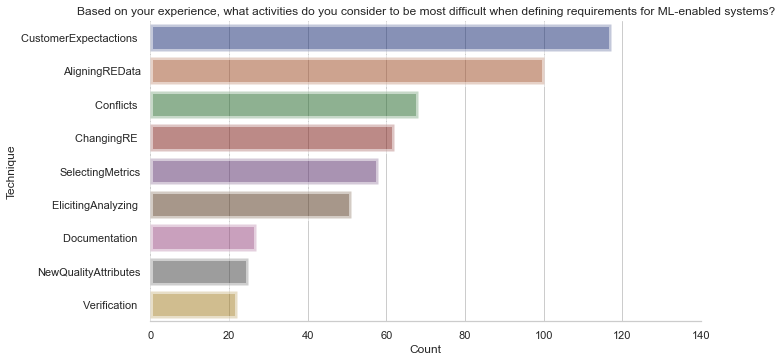

In [7]:
single_barplot(df_q12_quoted, "Answers", "Most_Difficult_Activity",
               title="Based on your experience, what activities do you consider to be most difficult when defining requirements for ML-enabled systems?",
               x_label="Count", y_label="Technique", x_label_rotation=0)

In [8]:
for other in list(df['Q12_RE_Most_Difficult_Activity_Customer_Others_Free'].unique()):
    print(other)

-99
nan
La trazabilidad de los requerimientos
Explaining to customer that ML-based system will not be a perfect box that will just take their data and predict everything
-66
